# How to use Google Colab
#  

### MNIST, Convolutional Neural Network (CNN)

### Step - 3

### MNIST由手寫阿拉伯數字組成，包含60,000個訓練樣本和10,000個測試樣本。

##### data from: https://keras.io/datasets/#mnist-database-of-handwritten-digits
##### code modified from: TensorFlow+Keras[深度學習]人工智慧實務應用 / 林大貴


# (1) Import the data from Keras

In [0]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(3)

In [0]:
# read in the file
from numpy import load 

data = load('mnist.npz')
lst = data.files
print(lst)

['x_test', 'x_train', 'y_train', 'y_test']


In [0]:
x_test_image  = data['x_test']     
x_train_image = data['x_train']
y_test_label  = data['y_test']
y_train_label = data['y_train']

print(x_train_image.shape)
print(y_train_label.shape)
print(x_test_image.shape)
print(y_test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# (2) View the first 10 images and labels

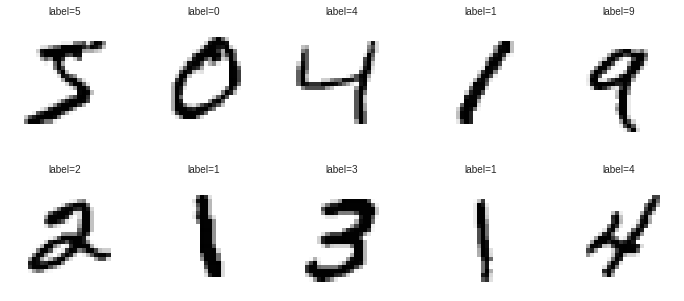

In [0]:
fig = plt.gcf()
fig.set_size_inches(12,14)

for i in range(0,10):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(x_train_image[i], cmap='binary')
    title= "label=" +str(y_train_label[i])
    ax.set_title(title,fontsize=10) 
    ax.set_xticks([]);ax.set_yticks([])        
plt.show()

# (3) Convert 2-D image to nx28x28x1 array, normalize the numbers

In [0]:
# convert 2-D 28x28 image to 4-D nx28x28x1  array

x_Train4D=x_train_image.reshape(x_train_image.shape[0],28,28,1).astype('float32')
x_Test4D=x_test_image.reshape(x_test_image.shape[0],28,28,1).astype('float32')

In [0]:
# normalize the image numbers to 0~1

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
print(x_Train4D_normalize.shape)
print(x_Test4D_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# (4) Convert label number to one-hot encoding

In [0]:
# convert label numbers to one-hot encoding

y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
print(y_TrainOneHot.shape)
print(y_TestOneHot.shape)

(60000, 10)
(10000, 10)


# (5) Use a Convolutional Neural Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [0]:
# Enable this cell in the second step

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())

In [0]:
# Enable this cell in the second step

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

# (6) Model training

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [0]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=50, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 3s - loss: 0.4867 - acc: 0.8459 - val_loss: 0.1025 - val_acc: 0.9692
Epoch 2/50
 - 3s - loss: 0.1449 - acc: 0.9568 - val_loss: 0.0668 - val_acc: 0.9786
Epoch 3/50
 - 3s - loss: 0.1045 - acc: 0.9690 - val_loss: 0.0581 - val_acc: 0.9822
Epoch 4/50
 - 3s - loss: 0.0877 - acc: 0.9742 - val_loss: 0.0485 - val_acc: 0.9843
Epoch 5/50
 - 3s - loss: 0.0727 - acc: 0.9782 - val_loss: 0.0428 - val_acc: 0.9878
Epoch 6/50
 - 3s - loss: 0.0634 - acc: 0.9807 - val_loss: 0.0407 - val_acc: 0.9883
Epoch 7/50
 - 3s - loss: 0.0555 - acc: 0.9837 - val_loss: 0.0390 - val_acc: 0.9890
Epoch 8/50
 - 3s - loss: 0.0498 - acc: 0.9846 - val_loss: 0.0350 - val_acc: 0.9899
Epoch 9/50
 - 3s - loss: 0.0462 - acc: 0.9854 - val_loss: 0.0347 - val_acc: 0.9903
Epoch 10/50
 - 3s - loss: 0.0423 - acc: 0.9867 - val_loss: 0.0372 - val_acc: 0.9890
Epoch 11/50
 - 3s - loss: 0.0367 - acc: 0.9884 - val_loss: 0.0334 - val_acc: 0.9909
Epoch 12/50
 - 3s - loss: 0.0366 - 

# (7) Training history

In [0]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

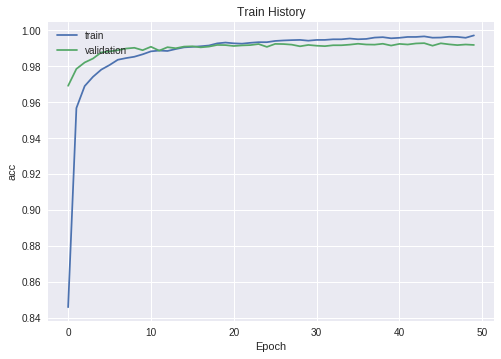

In [0]:
show_train_history(train_history,'acc','val_acc')

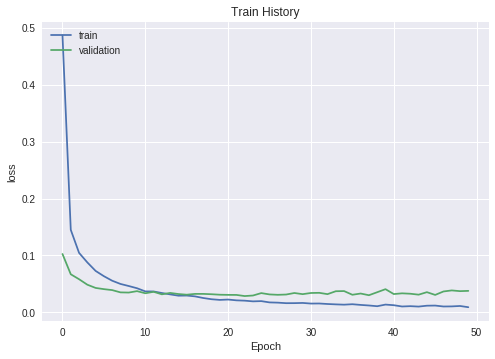

In [0]:
show_train_history(train_history,'loss','val_loss')

# (8) Accuracy

In [0]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 78us/step

accuracy= 0.9936


# (9) Prediction

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [0]:
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

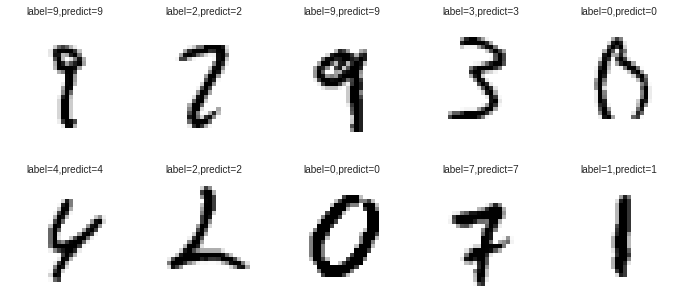

In [0]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=320)

# (10) Confusion matrix

In [0]:
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,0,0,0,2,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,1,1,1029,0,0,0,0,1,0,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,979,0,1,0,0,2
5,1,0,0,3,0,887,1,0,0,0
6,3,2,0,0,2,3,947,0,1,0
7,0,2,6,1,0,0,0,1018,1,0
8,2,0,3,1,0,0,0,1,965,2


In [0]:
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

In [0]:
model.save('my_model.h5')  
del model  # deletes the existing model

from keras.models import load_model
model = load_model('my_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________